In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
songs_data_path = "Music Info.csv"
user_data_path = "User Listening History .csv"

In [7]:
df_songs = pd.read_csv(songs_data_path)
df_songs.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [8]:
df_songs.shape 

(50683, 21)

In [9]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [11]:
columns_to_drop = ['spotify_preview_url']
df_songs.drop(columns=columns_to_drop, inplace=True)
df_songs.head()

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [12]:
df_songs.isna().sum()

track_id                0
name                    0
artist                  0
spotify_id              0
tags                 1127
genre               28335
year                    0
duration_ms             0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [13]:
import missingno as msno

<Axes: >

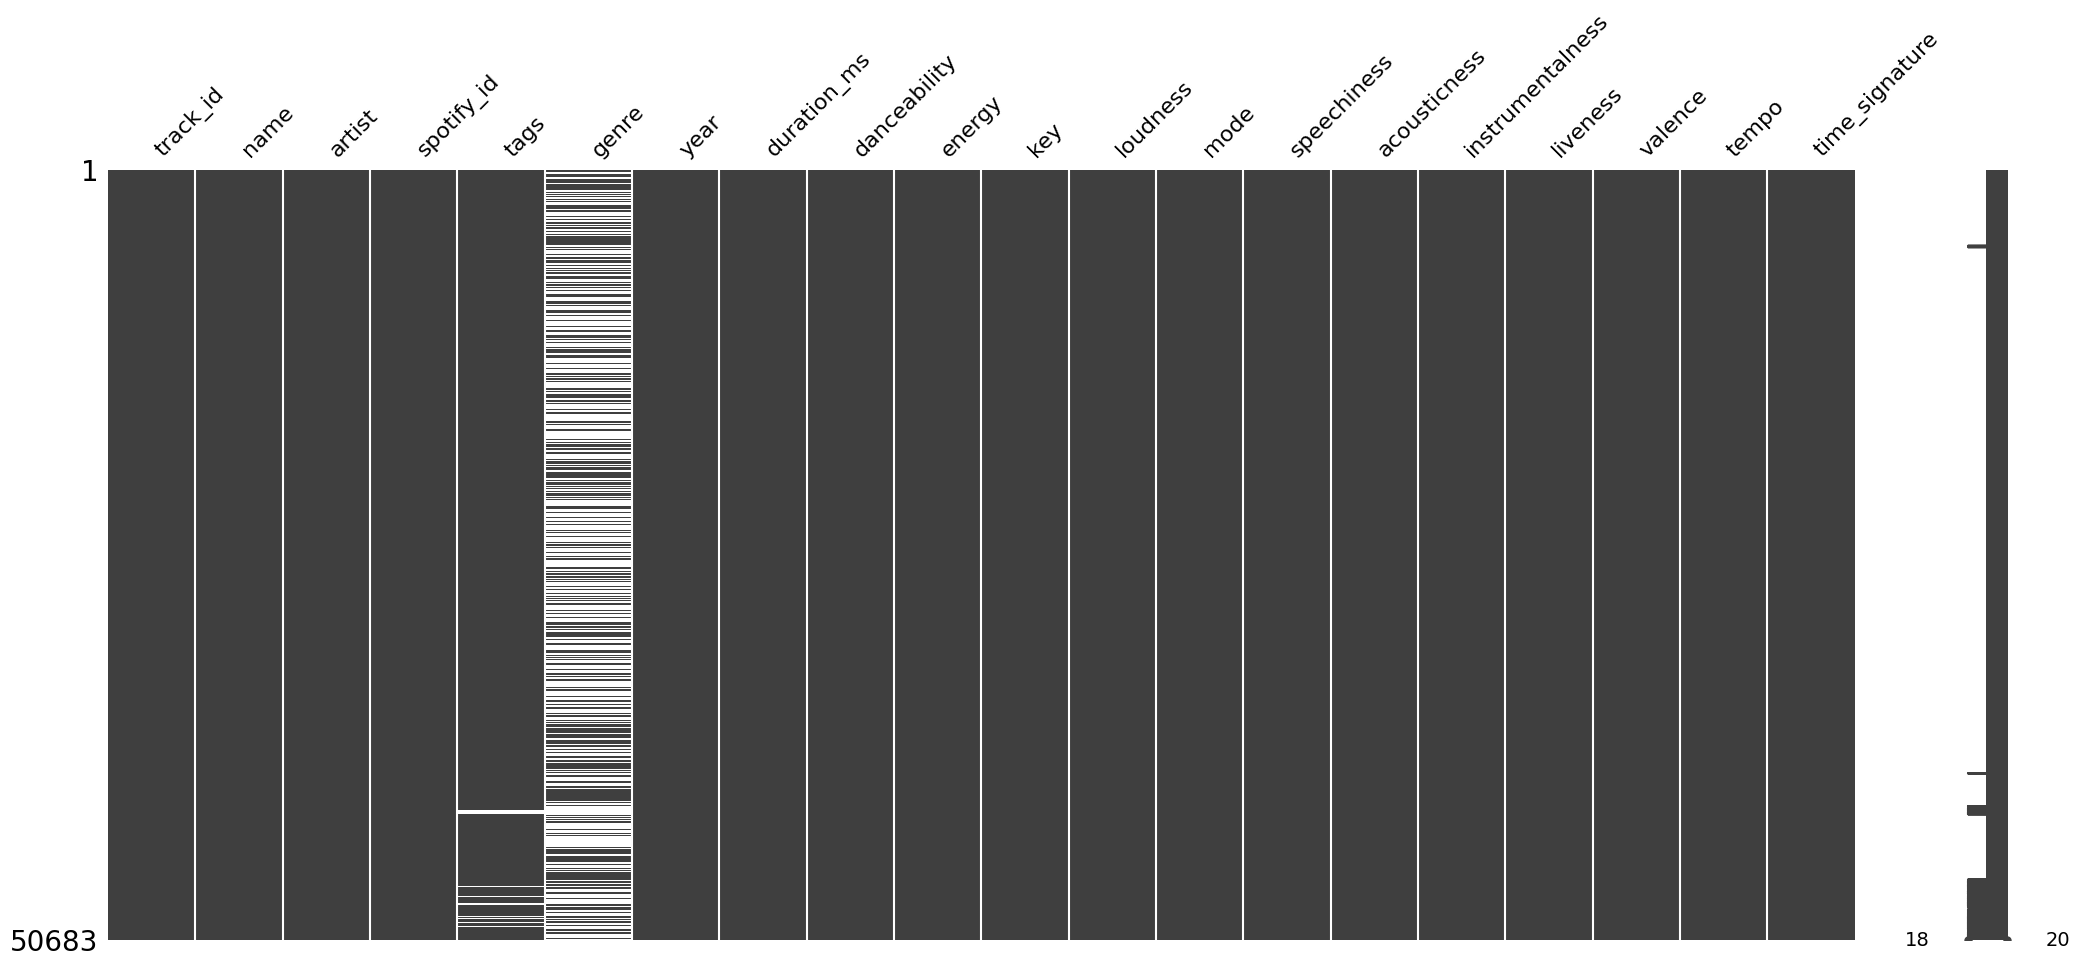

In [14]:
msno.matrix(df_songs)

In [16]:
# ratio of missing values
(
    df_songs
    .isna()
    .mean()
    .sort_values(ascending=False)
    .head(2)
    .mul(100)
)

genre    55.906320
tags      2.223625
dtype: float64

In [17]:
# check for duplicates
(
    df_songs
    .assign(name=df_songs['name'].str.lower())
    .duplicated(subset='name')
    .sum()
)

np.int64(815)

In [18]:
# rows that are duplicate
(
df_songs
.loc[
    df_songs
    .assign(name=df_songs['name'].str.lower())
    .duplicated(subset='name', keep=False)
]
.assign(name=df_songs['name'].str.lower())
.sort_values('name')
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
34480,TRKKZMK128F4257579,3 am,Liv Kristine,1TgsnkiolcBhQssCR37JXx,"female_vocalists, power_metal, gothic_metal, g...",NaN,2005,302880,0.516,0.840,0,-6.038,0,0.0390,0.152000,0.005970,0.107,0.441,78.009,4
6588,TRGGALK12903CB68E5,3 am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, pop, alternative_rock, 90s,...",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
29795,TRLOXMF128F934BF04,3am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, 90s, piano, american, pop_rock",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
43800,TRPWOAS128E0781045,3am,Halsey,1OfLNb6dQ9dra1B58iT9Ex,pop_rock,NaN,2020,234858,0.385,0.871,0,-4.604,0,0.0795,0.009060,0.000000,0.579,0.538,189.760,4
15088,TRJRBRX128F4255789,4th of july,Soundgarden,237oH9rNUYpIBeHfAn3WJ0,"hard_rock, 90s, grunge",NaN,1994,308866,0.368,0.749,5,-5.523,0,0.0392,0.109000,0.000372,0.175,0.193,141.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34772,TRJFGYO128F4259743,you're the one that i want,Lo-Fang,1dEHQktvcM8vCCyI1x7yVB,"indie, male_vocalists, cover",NaN,2014,204706,0.445,0.309,11,-12.517,0,0.0404,0.643000,0.000369,0.224,0.153,119.754,4
32677,TRFZYLL128F146902A,you've really got a hold on me,Smokey Robinson and The Miracles,03AkIZeRvGpTvDF9vNJtdj,"soul, 60s, oldies",Rock,2012,179513,0.674,0.515,0,-6.895,1,0.0296,0.724000,0.000000,0.339,0.596,116.678,3
20976,TRUXHGS128F145E41A,you've really got a hold on me,The Miracles,01FtGX94CSvO5Zxs5B6AMM,"soul, 60s, oldies",NaN,1994,180266,0.679,0.406,0,-10.533,1,0.0312,0.755000,0.000000,0.412,0.511,117.940,3
27680,TRXWPMW12903CB42A0,zombies,Childish Gambino,73kAUSAht4YOR7xNPmNb2L,funk,NaN,2016,281813,0.653,0.411,0,-11.986,1,0.1270,0.503000,0.000969,0.067,0.468,160.055,4


In [19]:
# now we will find duplicates based on the spotify_id
(
    df_songs
    .duplicated(subset='spotify_id')
    .sum()
)

np.int64(9)

In [21]:
# rows that are duplicate
(
    df_songs
    .loc[
        df_songs
        .duplicated(subset=['spotify_id',"year","duration_ms"], keep=False)
    ]
    .sort_values(['spotify_id',"year","duration_ms"])
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15326,TRJNHPN128F92EF139,Adagio For Strings,Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,"instrumental, classical, soundtrack, beautiful",NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
21570,TRLSRQD128F426CFF8,"Adagio for Strings, Op. 11",Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,classical,NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
14861,TRLOZQZ128F92E8A3F,How Do You Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop",NaN,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
14981,TRXHJQY128F42B5094,How Do U Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop, american",Rap,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
37040,TRGCZFO128F92EE221,Je pense à toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,"alternative, beautiful, french",NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
49162,TRZBNQU128F148C04F,Je Pense A Toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,NaN,NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
13427,TRJQFIT128E0781CED,Too Much Too Young,The Specials,0ndKJL8gA4zLl317M7vndn,"punk, 80s, new_wave, reggae, ska",NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
46512,TRDTUTO128F422F138,Too Much Too Young (Live),The Specials,0ndKJL8gA4zLl317M7vndn,ska,NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
1684,TRRZUGN128F42A1EEE,There There,Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",Rock,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4
2983,TRXFHCL128F92E0989,"There, There",Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",NaN,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4


In [22]:
df_songs.drop_duplicates(subset=['spotify_id',"year","duration_ms"], inplace=True)

In [23]:
(
    df_songs
    .duplicated(subset=['spotify_id',"year","duration_ms"])
    .sum()
)

np.int64(0)

In [24]:
df_songs.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [25]:
df_songs.dtypes

track_id             object
name                 object
artist               object
spotify_id           object
tags                 object
genre                object
year                  int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [26]:
df_songs.shape

(50674, 20)

In [27]:
categorical_features = df_songs.select_dtypes(include=['object']).columns
categorical_features

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre'], dtype='object')

In [28]:
def categorical_analysis(df,feature_name,k_artists=15):
    for feature in feature_name:
        print(f"Number of categories in column {feature} are ",df[feature].str.lower().nunique())

        if feature in ['artist','genre']:
            print(df[feature].value_counts().head(k_artists))
        
        if feature == 'genre':
            print(f"the unique categories in {feature} column are ",df[feature].dropna().unique())
        print("*"*75)

In [29]:
categorical_analysis(df_songs,categorical_features)

Number of categories in column track_id are  50674
***************************************************************************
Number of categories in column name are  49860
***************************************************************************
Number of categories in column artist are  8317
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Iron Maiden            76
In Flames              76
Elliott Smith          76
Mogwai                 75
Boards of Canada       75
Name: count, dtype: int64
***************************************************************************
Number of categories in column spotify_id are  50674
***************************************************************************
Number of categories in column tags are  20054
***************************

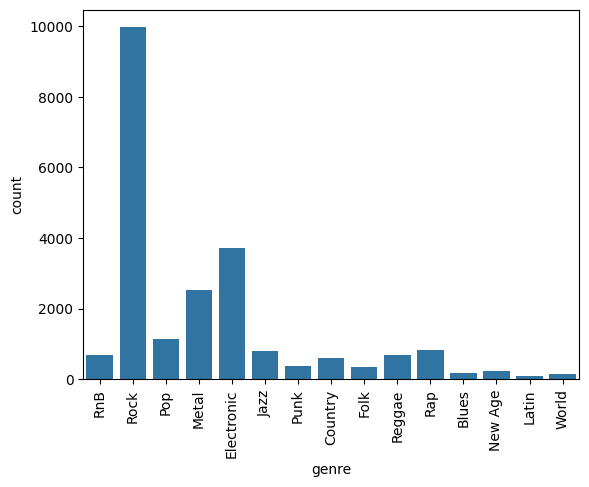

In [31]:
# countplot of genre
sns.countplot(df_songs,x='genre')
plt.xticks(rotation=90)
plt.show()

In [32]:
genre_group = df_songs.groupby('genre')
genre_group[['genre','tags']].sample(3)

,genre,tags
25872,Blues,"alternative, punk, japanese"
13654,Blues,"punk, punk_rock"
42240,Blues,blues
33575,Country,country
16224,Country,"metal, black_metal, melodic_death_metal, gothi..."
33562,Country,country
45233,Electronic,drum_and_bass
11399,Electronic,"electronic, ambient, chillout, psychedelic, do..."
40068,Electronic,"ambient, dark_ambient"
33881,Folk,country


In [33]:
# song title that are not in english
(
    df_songs
    .loc[
        df_songs
        .loc[:,'name']
        .str.contains("[^\d\w\s,?!':;-_(){},\.#-&/-]")
    ]
)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vasug\AppData\Local\Temp\ipykernel_18892\1192693025.py:7: SyntaxWarning: invalid escape sequence '\d'
  .str.contains("[^\d\w\s,?!':;-_(){},\.#-&/-]")


,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2455,TRBGIZH128F4252D9E,2 + 2 = 5,Radiohead,0dUSgj5UiJHY92RCuEFYcx,"rock, electronic, alternative, indie, alternat...",Rock,2008,199360,0.443,0.717,5,-5.498,0,0.0504,0.182000,0.000051,0.3450,0.3860,149.582,4
4463,TRGHMRU128F1478067,"I Put The ""Metro"" In Metronome",Cute Is What We Aim For,718VxOgHaLU7oGS9686hg6,"alternative, emo",Rock,2006,206053,0.538,0.858,11,-3.862,1,0.0638,0.085200,0.000000,0.2580,0.7060,149.971,4
6870,TRGIILN12903CE46BB,1+1,Beyoncé,0b4bcwV5QWTzgza5u1gh5C,"female_vocalists, soul, rnb, beautiful",NaN,2011,273880,0.303,0.384,6,-7.342,1,0.0339,0.381000,0.000005,0.0661,0.2610,63.345,5
7902,TRZMLSV128F9305C8C,B********,Rammstein,2fKyVXrtvFkqv5lVPf1UXa,"metal, industrial, german",Rock,2009,254013,0.352,0.905,9,-3.792,1,0.0836,0.000895,0.218000,0.1810,0.3270,141.016,3
7974,TRFRAEO128F4279C87,F**k the System,System of a Down,0uvPnGOwcaUNT6gwJF98wL,"metal, nu_metal",Metal,2002,132733,0.474,0.994,8,-1.884,1,0.1030,0.002160,0.126000,0.3140,0.8470,171.433,4
10722,TRODWHD128F92FD8BA,4 + 20,"Crosby, Stills, Nash & Young",2jZPEeW2ynykb2GkVqpOkJ,"rock, classic_rock, folk, singer_songwriter, a...",Rock,1970,126640,0.638,0.058,4,-25.243,1,0.0388,0.928000,0.079000,0.1130,0.1260,140.964,4
13127,TRLMIXB128EF3435DD,M+M's,blink-182,0z6VQdAqi0HjQYULMUYpBt,"punk, punk_rock",NaN,2005,155680,0.212,0.921,9,-6.092,1,0.0567,0.000054,0.003990,0.0669,0.6800,159.629,4
14454,TRKEIVB128F930A597,"Nuthin' But a ""G"" Thang",Dr. Dre,1qaZx6y94LiMy2KdhHxRTy,"rap, 90s, hip_hop",NaN,2005,230026,0.817,0.704,7,-8.336,1,0.2850,0.009390,0.000000,0.0850,0.6800,94.627,4
17862,TRBZLOG12903CB78FD,I Belong To You [+Mon Coeur S'Ouvre A Ta Voix],Muse,114rzL6VEy9bb3amPcY3tw,"rock, alternative_rock, progressive_rock, soun...",Rock,2009,338813,0.481,0.603,2,-6.590,1,0.0280,0.166000,0.032100,0.1090,0.2130,105.974,4
22541,TRYVOPZ128F4254176,£4,These New Puritans,1LsQ5WkLU8ubiAz6AtMNll,"electronic, alternative, british, industrial, ...",Rock,2008,133173,0.692,0.759,11,-9.216,1,0.0533,0.052200,0.012900,0.4630,0.2560,99.988,4


In [34]:
# artist name that are not in english
(
    df_songs
    .loc[
        df_songs
        .loc[:,'artist']
        .str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")
    ]
)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vasug\AppData\Local\Temp\ipykernel_18892\1308106212.py:7: SyntaxWarning: invalid escape sequence '\d'
  .str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")


,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
419,TRMYECS128F92DE4B4,Rabbit Heart (Raise It Up),Florence + the Machine,0AXtUwPpFDkNLcOzNZH4ir,"rock, alternative, indie, pop, female_vocalist...",Rock,2010,232360,0.625,0.858,9,-3.483,0,0.0462,0.09200,0.000001,0.2660,0.418,116.980,4
627,TRBSOCU128F147CD97,Howl,Florence + the Machine,0O8rwnPniPEUX71uLpSIE6,"rock, alternative, indie, female_vocalists, in...",Rock,2009,214053,0.584,0.858,0,-4.026,1,0.0654,0.00780,0.000467,0.1660,0.273,129.998,4
703,TRMAJOR128F92F990D,Drumming Song,Florence + the Machine,0idoUYxPn2oQFjk85p3KQk,"rock, alternative, indie, female_vocalists, in...",Rock,2009,223826,0.444,0.810,4,-4.790,0,0.0434,0.00127,0.000952,0.0958,0.496,199.971,4
941,TRRWJLU128F92F9912,My Boy Builds Coffins,Florence + the Machine,1KxcbEY0asYVMR043MjZWq,"rock, alternative, indie, pop, female_vocalist...",Rock,2009,176733,0.615,0.721,5,-6.244,1,0.0740,0.17200,0.000000,0.0847,0.188,122.042,4
1062,TRPVKQM128F932BE00,Hurricane Drunk,Florence + the Machine,0dj6mtoqOvAtBtfXsy2BG0,"rock, alternative, indie, pop, female_vocalist...",NaN,2009,193346,0.427,0.865,4,-4.691,1,0.2060,0.16300,0.000022,0.3160,0.208,184.310,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47973,TRRFEPG128F425736C,Chapter 13,+44,0iFXanNHxKPcEWHEx8Orow,punk_rock,NaN,2006,307293,0.419,0.811,2,-4.033,1,0.0325,0.00117,0.000006,0.0700,0.192,144.085,4
49587,TROXHNP12903CDC696,Africa Must Wake Up,"Nas & Damian ""Jr. Gong"" Marley",0Bpq1yPSBTH5pgD0g0EmJj,"hip_hop, reggae, mellow",NaN,2010,400493,0.695,0.668,11,-6.005,0,0.1320,0.02520,0.000000,0.1080,0.422,139.053,4
50183,TRXCYNS128F934BD93,The Game Is Over,*NSYNC,54mxSb8VlMvj1QB2ryB9Rd,pop,NaN,2001,205466,0.727,0.850,4,-4.382,0,0.0884,0.03700,0.000000,0.3950,0.847,93.022,4
50221,TRNKCSL128F424C85A,The Two of Us,*NSYNC,2POkp1k4kaOaEp3eHEfple,pop,NaN,2001,231760,0.742,0.813,0,-5.462,1,0.0454,0.05790,0.000003,0.2350,0.921,134.004,4


In [35]:
df_songs['tags']

0        rock, alternative, indie, alternative_rock, in...
1        rock, alternative, indie, pop, alternative_roc...
2         rock, alternative, alternative_rock, 90s, grunge
3        rock, alternative, indie, alternative_rock, in...
4        rock, alternative, indie, alternative_rock, in...
                               ...                        
50678                                                  NaN
50679              rock, alternative_rock, japanese, cover
50680                      metal, metalcore, post_hardcore
50681                                                  NaN
50682                                       rock, japanese
Name: tags, Length: 50674, dtype: object

In [36]:
all_tags=[]
for tags in df_songs["tags"].dropna().str.replace(" ","").str.split(","):
    all_tags.extend(tags)

In [37]:
print("the number of unique tags are ",len(set(all_tags)))

the number of unique tags are  100


In [38]:
set(all_tags)

{'00s',
 '60s',
 '70s',
 '80s',
 '90s',
 'acoustic',
 'alternative',
 'alternative_rock',
 'ambient',
 'american',
 'avant_garde',
 'beautiful',
 'black_metal',
 'blues',
 'blues_rock',
 'british',
 'britpop',
 'chill',
 'chillout',
 'classic_rock',
 'classical',
 'country',
 'cover',
 'dance',
 'dark_ambient',
 'death_metal',
 'doom_metal',
 'downtempo',
 'drum_and_bass',
 'electro',
 'electronic',
 'emo',
 'experimental',
 'female_vocalists',
 'folk',
 'french',
 'funk',
 'german',
 'gothic',
 'gothic_metal',
 'grindcore',
 'grunge',
 'guitar',
 'hard_rock',
 'hardcore',
 'heavy_metal',
 'hip_hop',
 'house',
 'idm',
 'indie',
 'indie_pop',
 'indie_rock',
 'industrial',
 'instrumental',
 'j_pop',
 'japanese',
 'jazz',
 'lounge',
 'love',
 'male_vocalists',
 'mellow',
 'melodic_death_metal',
 'metal',
 'metalcore',
 'new_age',
 'new_wave',
 'noise',
 'nu_metal',
 'oldies',
 'piano',
 'polish',
 'pop',
 'pop_rock',
 'post_hardcore',
 'post_punk',
 'post_rock',
 'power_metal',
 'progress

In [41]:
# same but using pandas
(
    df_songs
    .loc[:,"tags"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .nunique()
)

100

In [44]:
integer_columns = df_songs.select_dtypes(include="int").columns
integer_columns

Index(['year', 'duration_ms', 'key', 'mode', 'time_signature'], dtype='object')

In [45]:
df_songs[integer_columns]

,year,duration_ms,key,mode,time_signature
0,2004,222200,1,1,4
1,2006,258613,2,1,4
2,1991,218920,4,0,4
3,2004,237026,9,1,4
4,2008,238640,7,1,4
...,...,...,...,...,...
50678,2008,273440,6,0,4
50679,2004,275133,0,1,4
50680,2014,254826,10,0,4
50681,2008,243293,4,0,4


In [47]:
(
    df_songs
    .loc[:,integer_columns]
    .drop(columns=["duration_ms"])
    .assign(**{
        col: df_songs[col].astype("object")
        for col in integer_columns.drop("duration_ms")
    })
    .describe()
)

,year,key,mode,time_signature
count,50674,50674,50674,50674
unique,75,12,2,5
top,2007,9,1,4
freq,4221,5907,31979,44981


In [48]:
# range of data
(
    df_songs
    .loc[:,integer_columns]
    .assign(duration_minutes = df_songs["duration_ms"].div(1000).div(60))
    .drop(columns=["duration_ms"])
    .agg(['min',"max"])
)

,year,key,mode,time_signature,duration_minutes
min,1900,0,0,0,0.023983
max,2022,11,1,5,63.606217


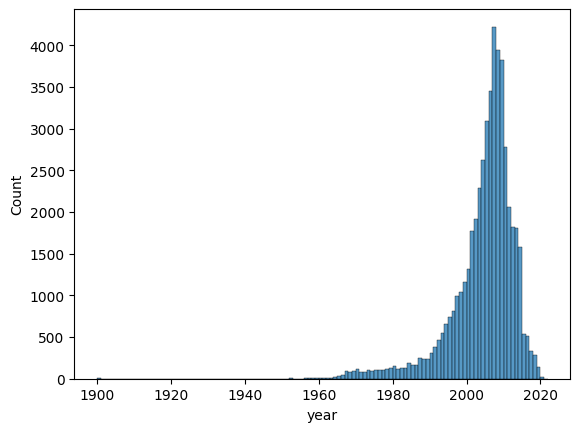

In [51]:
# number of songs per year in data 
sns.histplot(df_songs,x='year',bins = df_songs['year'].max() - df_songs["year"].min(),stat="count")
plt.show()

In [52]:
# most song from which year
(
    df_songs
    .loc[:,"year"]
    .value_counts()
    .head(5)
    .sort_index()

)

year
2005    3085
2006    3453
2007    4221
2008    3947
2009    3827
Name: count, dtype: int64

<Axes: title={'center': 'Percentage of songs wrt to key'}, xlabel='percentage', ylabel='key'>

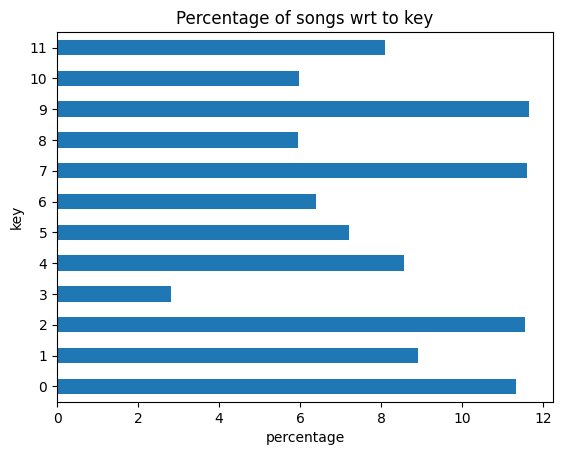

In [55]:
# unique value in the key column 
(
    df_songs['key']
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .plot(kind='barh',title='Percentage of songs wrt to key',xlabel="percentage")
)

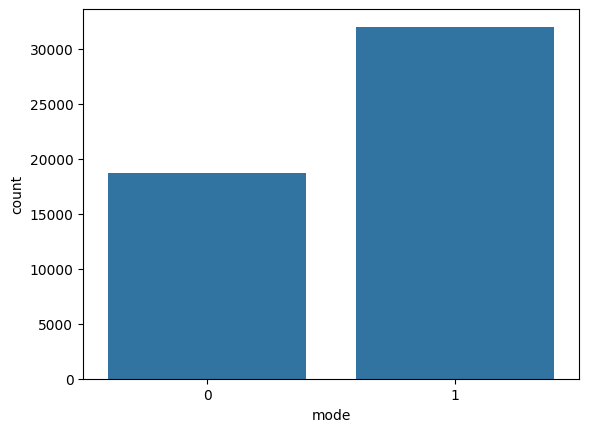

In [56]:
# countplot for mode
sns.countplot(df_songs,x='mode')
plt.show()

In [57]:
# unique value for time signature
(
    np.sort(df_songs
            .loc[:,"time_signature"]
            .unique())
)

array([0, 1, 3, 4, 5])

In [58]:
(
    df_songs['time_signature']
    .value_counts(normalize=True)
    .mul(100)
)

time_signature
4    88.765442
3     8.880294
5     1.444528
1     0.890003
0     0.019734
Name: proportion, dtype: float64

In [ ]:
# 43.20